In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv("Churn.csv",na_values='Nan')
data

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      4993 non-null   float64
 13  eve.mins        4976 non-null   float64
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [5]:
data.isna().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [8]:
data.rename(columns={'area.code':'area_code','account.length':'account_length','voice.plan':'voice_plan',
                     'voice.messages':'voice_messages','intl.plan':'intl_plan','intl.mins':'intl_mins',
                    'intl.calls':'intl_calls','intl.charge':'intl_charge','day.mins':'day_mins','day.calls':'day_calls',
                    'day.charge':'day_charge','eve.mins':'eve_mins','eve.calls':'eve_calls','eve.charge':'eve_charge',
                    'night.mins':'night_mins','night.calls':'night_calls','night.charge':'night_charge','customer.calls':'customer_calls'
                    },inplace=True)
data

,Unnamed: 0,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,...,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [10]:
le = preprocessing.LabelEncoder()
objlist = ['area_code','intl_plan','voice_plan','churn','state']
data[objlist] = data[objlist].apply(le.fit_transform)

In [11]:
data

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4996,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4998,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [12]:
data.columns

Index(['state', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'churn'],
      dtype='object')

In [13]:
data = data[[ 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_calls', 'intl_charge',
       'day_calls', 'day_charge', 'eve_calls', 'eve_charge', 
       'night_calls', 'night_charge', 'customer_calls', 'churn']]
data

,account_length,voice_plan,voice_messages,intl_plan,intl_calls,intl_charge,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,customer_calls,churn
0,128,1,25,0,3,2.70,110,45.07,99,16.78,91,11.01,1,0
1,107,1,26,0,3,3.70,123,27.47,103,16.62,103,11.45,1,0
2,137,0,0,0,5,3.29,114,41.38,110,10.30,104,7.32,0,0
3,84,0,0,1,7,1.78,71,50.90,88,5.26,89,8.86,2,0
4,75,0,0,1,3,2.73,113,28.34,122,12.61,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,40,0,5,2.67,127,40.07,126,18.96,116,13.39,2,0
4996,152,0,0,0,2,3.97,90,31.31,73,21.83,113,9.61,3,1
4997,61,0,0,0,4,3.67,89,23.90,128,14.69,97,9.56,1,0
4998,109,0,0,0,6,2.30,67,32.10,92,14.59,89,10.10,0,0


In [14]:
data['Total_Charge'] =  data['day_charge'] + data['eve_charge'] + data['night_charge']

In [15]:
data

,account_length,voice_plan,voice_messages,intl_plan,intl_calls,intl_charge,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,customer_calls,churn,Total_Charge
0,128,1,25,0,3,2.70,110,45.07,99,16.78,91,11.01,1,0,72.86
1,107,1,26,0,3,3.70,123,27.47,103,16.62,103,11.45,1,0,55.54
2,137,0,0,0,5,3.29,114,41.38,110,10.30,104,7.32,0,0,59.00
3,84,0,0,1,7,1.78,71,50.90,88,5.26,89,8.86,2,0,65.02
4,75,0,0,1,3,2.73,113,28.34,122,12.61,121,8.41,3,0,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,40,0,5,2.67,127,40.07,126,18.96,116,13.39,2,0,72.42
4996,152,0,0,0,2,3.97,90,31.31,73,21.83,113,9.61,3,1,62.75
4997,61,0,0,0,4,3.67,89,23.90,128,14.69,97,9.56,1,0,48.15
4998,109,0,0,0,6,2.30,67,32.10,92,14.59,89,10.10,0,0,56.79


In [16]:
data.drop(['day_charge','eve_charge','night_charge'],axis=1,inplace=True)

In [17]:
data=data.iloc[:,[10,0,1,2,3,4,5,6,7,8,9,11]]

In [18]:
data

,churn,account_length,voice_plan,voice_messages,intl_plan,intl_calls,intl_charge,day_calls,eve_calls,night_calls,customer_calls,Total_Charge
0,0,128,1,25,0,3,2.70,110,99,91,1,72.86
1,0,107,1,26,0,3,3.70,123,103,103,1,55.54
2,0,137,0,0,0,5,3.29,114,110,104,0,59.00
3,0,84,0,0,1,7,1.78,71,88,89,2,65.02
4,0,75,0,0,1,3,2.73,113,122,121,3,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,50,1,40,0,5,2.67,127,126,116,2,72.42
4996,1,152,0,0,0,2,3.97,90,73,113,3,62.75
4997,0,61,0,0,0,4,3.67,89,128,97,1,48.15
4998,0,109,0,0,0,6,2.30,67,92,89,0,56.79


In [19]:
x = data.iloc[:,1:]
x

,account_length,voice_plan,voice_messages,intl_plan,intl_calls,intl_charge,day_calls,eve_calls,night_calls,customer_calls,Total_Charge
0,128,1,25,0,3,2.70,110,99,91,1,72.86
1,107,1,26,0,3,3.70,123,103,103,1,55.54
2,137,0,0,0,5,3.29,114,110,104,0,59.00
3,84,0,0,1,7,1.78,71,88,89,2,65.02
4,75,0,0,1,3,2.73,113,122,121,3,49.36
...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,40,0,5,2.67,127,126,116,2,72.42
4996,152,0,0,0,2,3.97,90,73,113,3,62.75
4997,61,0,0,0,4,3.67,89,128,97,1,48.15
4998,109,0,0,0,6,2.30,67,92,89,0,56.79


In [20]:
y = data.iloc[:,0:1]
y

,churn
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,1
4997,0
4998,0


In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
transformer = RobustScaler().fit(x)
x=transformer.transform(x)

In [23]:
x

array([[ 0.51851852,  1.        ,  1.47058824, ..., -0.34615385,
         0.        ,  1.16008615],
       [ 0.12962963,  1.        ,  1.52941176, ...,  0.11538462,
         0.        , -0.08327351],
       [ 0.68518519,  0.        ,  0.        , ...,  0.15384615,
        -1.        ,  0.16511127],
       ...,
       [-0.72222222,  0.        ,  0.        , ..., -0.11538462,
         0.        , -0.6137832 ],
       [ 0.16666667,  0.        ,  0.        , ..., -0.42307692,
        -1.        ,  0.00646088],
       [-0.25925926,  1.        ,  2.        , ...,  0.        ,
        -1.        , -0.36109117]])

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=15)

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [27]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[1254   39]
 [ 156   42]]


In [29]:
print(classification_report(y_test,y_pred))
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support = score(y_test,y_pred,average='macro')
LR=fscore
LR

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1293
           1       0.52      0.21      0.30       198

    accuracy                           0.87      1491
   macro avg       0.70      0.59      0.61      1491
weighted avg       0.84      0.87      0.84      1491



0.6144666022221427

In [30]:
#KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train, cv = 10)
    k_scores.append(scores.mean())
    print("K value=",k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(classification_report(y_test,pred))

K value= 1
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1293
           1       0.56      0.48      0.52       198

    accuracy                           0.88      1491
   macro avg       0.74      0.71      0.73      1491
weighted avg       0.87      0.88      0.88      1491

K value= 3
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1293
           1       0.75      0.40      0.52       198

    accuracy                           0.90      1491
   macro avg       0.83      0.69      0.73      1491
weighted avg       0.89      0.90      0.89      1491

K value= 5
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1293
           1       0.84      0.38      0.52       198

    accuracy                           0.91      1491
   macro avg       0.88      0.68      0.74      1491
weighted avg       0.90      0.91      0.

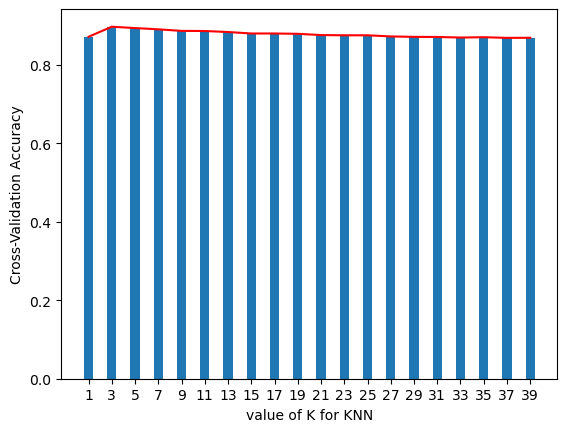

In [31]:
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color = "red")
    
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_range)
plt.show()

In [32]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [33]:
print(classification_report(y_test,pred))
precision,recall,fscore,support = score(y_test,pred,average='macro')
KNN=fscore
KNN

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1293
           1       0.75      0.40      0.52       198

    accuracy                           0.90      1491
   macro avg       0.83      0.69      0.73      1491
weighted avg       0.89      0.90      0.89      1491



0.7336637359144649

In [34]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion='gini',min_samples_split=5)
model.fit(x_train,y_train)
pred = model.predict(x_test)
metrics.accuracy_score(pred,y_test)
print(classification_report(y_test,pred))
precision,recall,fscore,support = score(y_test,pred,average='macro')
DT=fscore
DT

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1293
           1       0.85      0.80      0.83       198

    accuracy                           0.96      1491
   macro avg       0.91      0.89      0.90      1491
weighted avg       0.95      0.96      0.95      1491



0.9000875135646025

In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
model.fit(x_train,y_train)
pred = model.predict(x_test)
metrics.accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1293
           1       0.83      0.80      0.82       198

    accuracy                           0.95      1491
   macro avg       0.90      0.89      0.89      1491
weighted avg       0.95      0.95      0.95      1491



In [36]:
# Random Forest Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

num_trees = 140
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8, max_features=max_features, random_state = 8)

model.fit(x_train,y_train)

pred = model.predict(x_test)

print(classification_report(y_test,pred))
precision,recall,fscore,support = score(y_test,pred,average='macro')
RD=fscore
RD

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1074
           1       0.98      0.85      0.91       169

    accuracy                           0.98      1243
   macro avg       0.98      0.92      0.95      1243
weighted avg       0.98      0.98      0.98      1243



0.9492445896284197

In [37]:
#SVM
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# clf = SVC()
# param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,15,14,13,12,11,10,0.1] }]
# gsv = GridSearchCV(clf,param_grid,cv=10)
# gsv.fit(x_train,y_train)


In [38]:
#gsv.best_params_ , gsv.best_score_ 

In [39]:
clf = SVC(C= 1, gamma = 0.5,kernel="rbf")
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
precision,recall,fscore,support = score(y_test,y_pred,average='macro')
SVM=fscore
SVM

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1074
           1       0.92      0.51      0.66       169

    accuracy                           0.93      1243
   macro avg       0.92      0.75      0.81      1243
weighted avg       0.93      0.93      0.92      1243



0.8092934293429344

In [40]:
#ANN
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=11,activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 351 (1.37 KB)

 Trainable params: 351 (1.37 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile model
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
history = model.fit(x,y,validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8581 - loss: 0.4515 - val_accuracy: 0.8581 - val_loss: 0.4249
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8581 - loss: 0.4150 - val_accuracy: 0.8581 - val_loss: 0.4078
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8581 - loss: 0.4055 - val_accuracy: 0.8581 - val_loss: 0.4026
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8581 - loss: 0.4015 - val_accuracy: 0.8581 - val_loss: 0.3990
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8581 - loss: 0.3983 - val_accuracy: 0.8581 - val_loss: 0.3954
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8581 - loss: 0.3947 - val_accuracy: 0.8581 - val_loss: 0.3917
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8581 - loss: 0.3910 - val_accuracy: 0.8581 - val_loss: 0.3878
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8581 - loss: 0.3869 - val_accuracy: 0.8581 - val_loss

In [44]:
model.save_weights("mywt.weights.h5")


In [45]:
#evaluate the model
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
ANN=model.metrics_names[1], scores[1]*100
ANN=ANN[1]
ANN

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3120 
compile_metrics: 86.58%


86.5767776966095

In [46]:
#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [47]:
y_pred =  nb.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(y_test, y_pred)
conf_matrix1

array([[980,  94],
       [ 91,  78]])

In [49]:
import seaborn as sns
%matplotlib inline
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')

Text(20.722222222222214, 0.5, 'True Class')

In [50]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(y_test, y_pred,target_names=names))
precision,recall,fscore,support = score(y_test,y_pred,average='macro')
NB=fscore
NB

                 precision    recall  f1-score   support

0-Less than 50K       0.92      0.91      0.91      1074
    1-Above 50K       0.45      0.46      0.46       169

       accuracy                           0.85      1243
      macro avg       0.68      0.69      0.69      1243
   weighted avg       0.85      0.85      0.85      1243



0.6856154598090082

In [51]:
#Bagging

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

num_trees = 100
model = BaggingClassifier(max_samples=0.8, n_estimators=num_trees,random_state=8)

model.fit(x_train,y_train)
pred = model.predict(x_test)
print(classification_report(y_test,pred))
precision,recall,fscore,support = score(y_test,pred,average='macro')
BG=fscore
BG

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1290
           1       0.95      0.88      0.91       201

    accuracy                           0.98      1491
   macro avg       0.97      0.93      0.95      1491
weighted avg       0.98      0.98      0.98      1491



0.9494100130132448

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__max_depth': [1, 2, 3, 4, 5],   # FIXED HERE
    'max_samples': [0.05, 0.1, 0.2, 0.5]
}

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # FIXED HERE
    n_estimators=100,
    max_features=0.5,
    random_state=42
)

clf = GridSearchCV(
    bag,
    param_grid,
    cv=5,
    n_jobs=-1
)

clf.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100,
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

In [53]:
clf.best_params_ , clf.best_score_

({'estimator__max_depth': 5, 'max_samples': 0.5},
 np.float64(0.8723397833457373))

Accuracy: 0.9121395036887995
Confusion Matrix:
 [[1267   23]
 [ 108   93]]


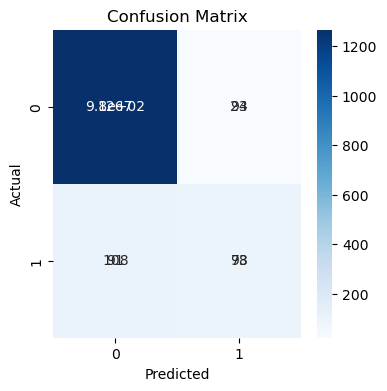

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1290
           1       0.80      0.46      0.59       201

    accuracy                           0.91      1491
   macro avg       0.86      0.72      0.77      1491
weighted avg       0.91      0.91      0.90      1491

ROC-AUC Score: 0.9133036368544872


In [54]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # weak learner
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import accuracy_score

#Accuracy (quick check)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

#Confusion Matrix (MOST IMPORTANT)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Precision, Recall, F1-score (INTERVIEW FAVORITE)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#ROC–AUC Score (BEST METRIC for churn)
from sklearn.metrics import roc_auc_score

y_prob = ada.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", roc_auc)


# Accuracy Sacores All Models

In [55]:
# initialize list elements
data1 = [['Logistic Regression',LR],['KNearest Nighbour',KNN],
        ['Decision Tree',DT],['Random Forest',RD],['Support Vector Machine',SVM],['Artificial Neural Network',ANN],
        ['Navie Bais',NB],['Bagging',BG],['AdaBoosting',ada]]
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data1, columns=['Algorithm Names','Accuracy'])
df

,Algorithm Names,Accuracy
0,Logistic Regression,0.614467
1,KNearest Nighbour,0.733664
2,Decision Tree,0.900088
3,Random Forest,0.949245
4,Support Vector Machine,0.809293
5,Artificial Neural Network,86.576778
6,Navie Bais,0.685615
7,Bagging,0.94941
8,AdaBoosting,"(DecisionTreeClassifier(max_depth=1, random_st..."


In [56]:
y_test = y_test.to_numpy()
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [60]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=15
)

clf = MLPClassifier(
    hidden_layer_sizes=(10,),
    max_iter=1000,
    random_state=15
)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(len(y_pred))
print(len(y_test))
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


1491
1491
[0 0 1 ... 0 0 0]
Accuracy: 94.43%


In [58]:
data

,churn,account_length,voice_plan,voice_messages,intl_plan,intl_calls,intl_charge,day_calls,eve_calls,night_calls,customer_calls,Total_Charge
0,0,128,1,25,0,3,2.70,110,99,91,1,72.86
1,0,107,1,26,0,3,3.70,123,103,103,1,55.54
2,0,137,0,0,0,5,3.29,114,110,104,0,59.00
3,0,84,0,0,1,7,1.78,71,88,89,2,65.02
4,0,75,0,0,1,3,2.73,113,122,121,3,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,50,1,40,0,5,2.67,127,126,116,2,72.42
4996,1,152,0,0,0,2,3.97,90,73,113,3,62.75
4997,0,61,0,0,0,4,3.67,89,128,97,1,48.15
4998,0,109,0,0,0,6,2.30,67,92,89,0,56.79


In [59]:
x

array([[ 0.51851852,  1.        ,  1.47058824, ..., -0.34615385,
         0.        ,  1.16008615],
       [ 0.12962963,  1.        ,  1.52941176, ...,  0.11538462,
         0.        , -0.08327351],
       [ 0.68518519,  0.        ,  0.        , ...,  0.15384615,
        -1.        ,  0.16511127],
       ...,
       [-0.72222222,  0.        ,  0.        , ..., -0.11538462,
         0.        , -0.6137832 ],
       [ 0.16666667,  0.        ,  0.        , ..., -0.42307692,
        -1.        ,  0.00646088],
       [-0.25925926,  1.        ,  2.        , ...,  0.        ,
        -1.        , -0.36109117]])

In [61]:
y

,churn
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,1
4997,0
4998,0


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create an instance of the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=0)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


In [63]:
import pickle

final_artifacts = {
    "model": model,                 # trained Random Forest
    "scaler": transformer,           # RobustScaler
    "label_encoder": le,             # LabelEncoder
    "feature_order": [
        'account_length',
        'voice_plan',
        'voice_messages',
        'intl_plan',
        'intl_calls',
        'intl_charge',
        'day_calls',
        'eve_calls',
        'night_calls',
        'customer_calls',
        'Total_Charge'
    ]
}

with open("churn_complete_pipeline.pkl", "wb") as f:
    pickle.dump(final_artifacts, f)

print("✅ Full project pipeline saved successfully!")


✅ Full project pipeline saved successfully!


In [65]:
import os
print(os.getcwd())
print(os.listdir())


C:\Users\Agnel Sharon Jerald\Machine learning
['.ipynb_checkpoints', 'boosting.ipynb', 'Cars.csv', 'Churn.csv', 'churn_complete_pipeline.pkl', 'churn_coustomer_prediction.zip', 'CHURN_CUSTOMER_PREDICTION_WITH_FEATURE_ENGINEERING.ipynb', 'CHURN_CUSTOMER_WITHOUT_FEATURE_ENGINEERING.ipynb', 'claimants.csv', 'Data Visualisations.ipynb', 'Decision Tree Classifier.ipynb', 'Decision Tree_C5.0_CART.ipynb', 'Iris Species decicision Tree.ipynb', 'KNN_updated.ipynb', 'Linear_Regression.ipynb', 'Logistic Regression.ipynb', 'Machine Learning basics.ipynb', 'Multi Linear Regression.ipynb', 'mywt.weights.h5', 'Numpy.ipynb', 'pima-indians-diabetes.csv', 'polynomial Regression.ipynb', 'Practice libraries.ipynb', 'Predicting Customer Purchase Behavior in the Travel Industry.ipynb', 'Random Forest Regression Implementation.ipynb', 'Travel.csv']
